<a href="https://colab.research.google.com/github/Oluwaferanmi1/classification/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os



In [ ]:
import os


In [ ]:
os.listdir("drive/MyDrive/train1")

In [ ]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
!pip install pandas
import pandas as pd
filenames = os.listdir("drive/MyDrive/train1")

#!ls ../inpu/

In [ ]:
filenames = os.listdir("drive/MyDrive/train1")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
cat_count = 0
dog_count = 0

for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        dog_count += 1
    else:
        cat_count += 1


print("dog count: ", dog_count)
print("cat count: ", cat_count)

dog count:  1510
cat count:  1500


In [ ]:
df.count()

filename    3010
category    3010
dtype: int64

In [ ]:
df.tail()

,filename,category
3005,cat.12.jpg,0
3006,cat.10.jpg,0
3007,cat.5.jpg,0
3008,cat.6.jpg,0
3009,cat.1499.jpg,0


In [ ]:
df.tail()

,filename,category
3005,cat.12.jpg,0
3006,cat.10.jpg,0
3007,cat.5.jpg,0
3008,cat.6.jpg,0
3009,cat.1499.jpg,0


<Axes: xlabel='category'>

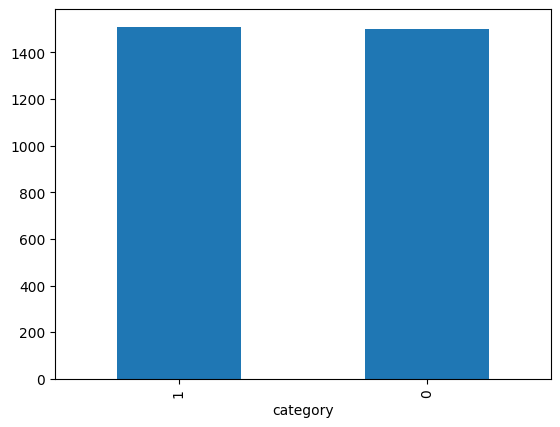

In [ ]:
df['category'].value_counts().plot.bar()

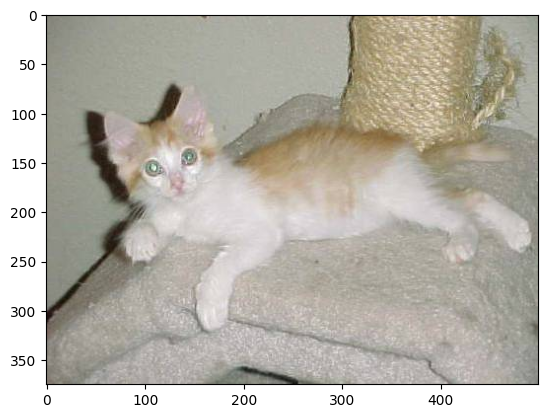

In [ ]:
sample = random.choice(filenames)
image = load_img("drive/MyDrive/train1/"+sample)
plt.imshow(image)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
earlystop = EarlyStopping(patience=10)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: xlabel='category'>

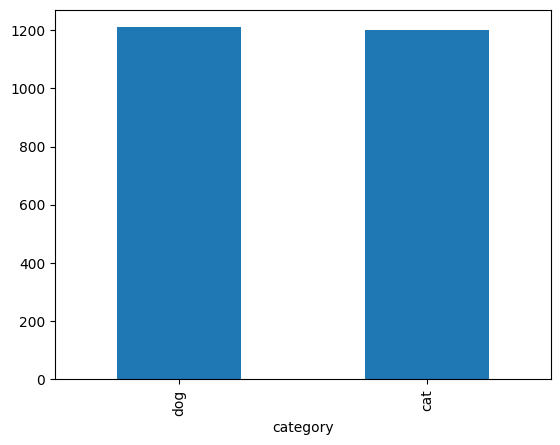

In [ ]:
train_df['category'].value_counts().plot.bar()

<Axes: xlabel='category'>

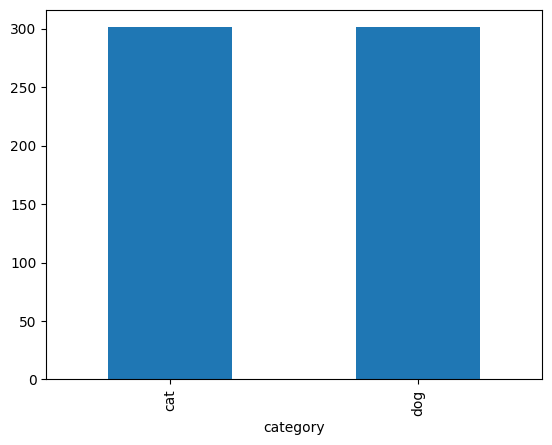

In [ ]:
validate_df['category'].value_counts().plot.bar()

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "drive/MyDrive/train1",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2408 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "drive/MyDrive/train1",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 602 validated image filenames belonging to 2 classes.


In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "drive/MyDrive/train1",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)


Found 1 validated image filenames belonging to 1 classes.


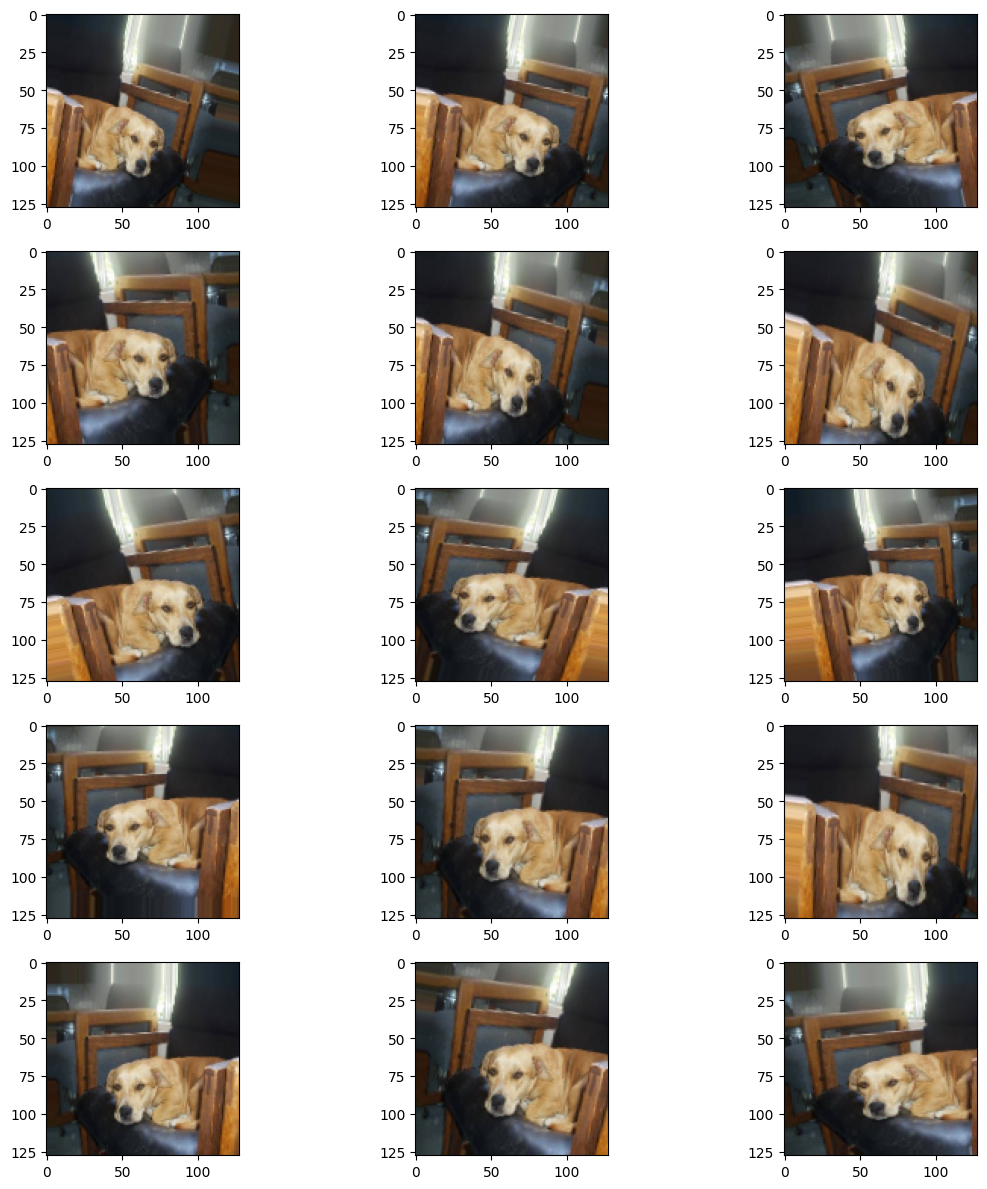

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

<ipython-input-27-035bd47b0476>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
160/160 [==============================] - ETA: 0s - loss: 1.1241 - accuracy: 0.5608

160/160 [==============================] - 1787s 11s/step - loss: 1.1241 - accuracy: 0.5608 - val_loss: 0.8065 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 2/50
160/160 [==============================] - ETA: 0s - loss: 0.8607 - accuracy: 0.5779

160/160 [==============================] - 140s 873ms/step - loss: 0.8607 - accuracy: 0.5779 - val_loss: 2.6438 - val_accuracy: 0.5217 - lr: 0.0010
Epoch 3/50
160/160 [==============================] - ETA: 0s - loss: 0.7707 - accuracy: 0.6047

160/160 [==============================] - 146s 909ms/step - loss: 0.7707 - accuracy: 0.6047 - val_loss: 0.6699 - val_accuracy: 0.6483 - lr: 0.0010
Epoch 4/50
160/160 [==============================] - ETA: 0s - loss: 0.6984 - accuracy: 0.6298

160/160 [==============================] - 142s 888ms/step - loss: 0.6984 - accuracy: 0.6298 - val_loss: 0.7199 - val_accuracy: 0.6033 - lr: 0.0010
Epoch 5/50
160/160 [==============================] - ETA: 0s - loss: 0.6512 - accuracy: 0.6569

160/160 [==============================] - 147s 914ms/step - loss: 0.6512 - accuracy: 0.6569 - val_loss: 0.6478 - val_accuracy: 0.6917 - lr: 0.0010
Epoch 6/50
160/160 [==============================] - ETA: 0s - loss: 0.6292 - accuracy: 0.6603

160/160 [==============================] - 149s 931ms/step - loss: 0.6292 - accuracy: 0.6603 - val_loss: 0.7907 - val_accuracy: 0.6750 - lr: 0.0010
Epoch 7/50
160/160 [==============================] - ETA: 0s - loss: 0.5987 - accuracy: 0.6908

160/160 [==============================] - 145s 906ms/step - loss: 0.5987 - accuracy: 0.6908 - val_loss: 0.6210 - val_accuracy: 0.7217 - lr: 0.0010
Epoch 8/50
160/160 [==============================] - ETA: 0s - loss: 0.5993 - accuracy: 0.6920

160/160 [==============================] - 145s 900ms/step - loss: 0.5993 - accuracy: 0.6920 - val_loss: 0.5710 - val_accuracy: 0.7133 - lr: 0.0010
Epoch 9/50
160/160 [==============================] - ETA: 0s - loss: 0.5675 - accuracy: 0.7046

160/160 [==============================] - 146s 913ms/step - loss: 0.5675 - accuracy: 0.7046 - val_loss: 0.5807 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 10/50
160/160 [==============================] - ETA: 0s - loss: 0.5616 - accuracy: 0.7263

160/160 [==============================] - 147s 919ms/step - loss: 0.5616 - accuracy: 0.7263 - val_loss: 0.5377 - val_accuracy: 0.7417 - lr: 0.0010
Epoch 11/50
160/160 [==============================] - ETA: 0s - loss: 0.5396 - accuracy: 0.7363

160/160 [==============================] - 148s 926ms/step - loss: 0.5396 - accuracy: 0.7363 - val_loss: 0.5791 - val_accuracy: 0.7317 - lr: 0.0010
Epoch 12/50
160/160 [==============================] - ETA: 0s - loss: 0.5442 - accuracy: 0.7267

160/160 [==============================] - 149s 930ms/step - loss: 0.5442 - accuracy: 0.7267 - val_loss: 0.6516 - val_accuracy: 0.6900 - lr: 0.0010
Epoch 13/50
160/160 [==============================] - ETA: 0s - loss: 0.5247 - accuracy: 0.7409

160/160 [==============================] - 152s 952ms/step - loss: 0.5247 - accuracy: 0.7409 - val_loss: 0.4552 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 14/50
160/160 [==============================] - ETA: 0s - loss: 0.5166 - accuracy: 0.7451

160/160 [==============================] - 143s 890ms/step - loss: 0.5166 - accuracy: 0.7451 - val_loss: 0.4794 - val_accuracy: 0.7783 - lr: 0.0010
Epoch 15/50
160/160 [==============================] - ETA: 0s - loss: 0.5212 - accuracy: 0.7472

160/160 [==============================] - 150s 936ms/step - loss: 0.5212 - accuracy: 0.7472 - val_loss: 0.5780 - val_accuracy: 0.7317 - lr: 0.0010
Epoch 16/50
160/160 [==============================] - ETA: 0s - loss: 0.5054 - accuracy: 0.7597

160/160 [==============================] - 146s 913ms/step - loss: 0.5054 - accuracy: 0.7597 - val_loss: 0.4637 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 17/50
160/160 [==============================] - ETA: 0s - loss: 0.4925 - accuracy: 0.7685

160/160 [==============================] - 149s 932ms/step - loss: 0.4925 - accuracy: 0.7685 - val_loss: 0.5881 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 18/50
160/160 [==============================] - ETA: 0s - loss: 0.4900 - accuracy: 0.7710

160/160 [==============================] - 153s 956ms/step - loss: 0.4900 - accuracy: 0.7710 - val_loss: 0.5411 - val_accuracy: 0.7633 - lr: 0.0010
Epoch 19/50
160/160 [==============================] - ETA: 0s - loss: 0.4965 - accuracy: 0.7702

160/160 [==============================] - 147s 919ms/step - loss: 0.4965 - accuracy: 0.7702 - val_loss: 0.5442 - val_accuracy: 0.7283 - lr: 0.0010
Epoch 20/50
160/160 [==============================] - ETA: 0s - loss: 0.4857 - accuracy: 0.7731

160/160 [==============================] - 150s 935ms/step - loss: 0.4857 - accuracy: 0.7731 - val_loss: 0.4336 - val_accuracy: 0.7967 - lr: 0.0010
Epoch 21/50
160/160 [==============================] - ETA: 0s - loss: 0.4532 - accuracy: 0.7902

160/160 [==============================] - 147s 920ms/step - loss: 0.4532 - accuracy: 0.7902 - val_loss: 0.4706 - val_accuracy: 0.7883 - lr: 0.0010
Epoch 22/50
160/160 [==============================] - ETA: 0s - loss: 0.4741 - accuracy: 0.7735

160/160 [==============================] - 146s 911ms/step - loss: 0.4741 - accuracy: 0.7735 - val_loss: 0.4320 - val_accuracy: 0.8017 - lr: 0.0010
Epoch 23/50
160/160 [==============================] - ETA: 0s - loss: 0.4643 - accuracy: 0.7848

160/160 [==============================] - 145s 907ms/step - loss: 0.4643 - accuracy: 0.7848 - val_loss: 0.4300 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 24/50
160/160 [==============================] - ETA: 0s - loss: 0.4515 - accuracy: 0.7973

160/160 [==============================] - 148s 925ms/step - loss: 0.4515 - accuracy: 0.7973 - val_loss: 0.6117 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 25/50
160/160 [==============================] - ETA: 0s - loss: 0.4478 - accuracy: 0.7894

160/160 [==============================] - 144s 901ms/step - loss: 0.4478 - accuracy: 0.7894 - val_loss: 0.4192 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 26/50
160/160 [==============================] - ETA: 0s - loss: 0.4327 - accuracy: 0.7982

160/160 [==============================] - 148s 919ms/step - loss: 0.4327 - accuracy: 0.7982 - val_loss: 0.8115 - val_accuracy: 0.6867 - lr: 0.0010
Epoch 27/50
160/160 [==============================] - ETA: 0s - loss: 0.4451 - accuracy: 0.7890

160/160 [==============================] - 144s 902ms/step - loss: 0.4451 - accuracy: 0.7890 - val_loss: 0.8231 - val_accuracy: 0.7267 - lr: 0.0010
Epoch 28/50
160/160 [==============================] - ETA: 0s - loss: 0.4338 - accuracy: 0.8044

160/160 [==============================] - 148s 922ms/step - loss: 0.4338 - accuracy: 0.8044 - val_loss: 0.7382 - val_accuracy: 0.6967 - lr: 0.0010
Epoch 29/50
160/160 [==============================] - ETA: 0s - loss: 0.4288 - accuracy: 0.8094

160/160 [==============================] - 146s 914ms/step - loss: 0.4288 - accuracy: 0.8094 - val_loss: 0.7779 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 30/50
160/160 [==============================] - ETA: 0s - loss: 0.4181 - accuracy: 0.8186

160/160 [==============================] - 148s 923ms/step - loss: 0.4181 - accuracy: 0.8186 - val_loss: 0.4133 - val_accuracy: 0.8183 - lr: 0.0010
Epoch 31/50
160/160 [==============================] - ETA: 0s - loss: 0.4287 - accuracy: 0.8061

160/160 [==============================] - 149s 930ms/step - loss: 0.4287 - accuracy: 0.8061 - val_loss: 0.8341 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 32/50
160/160 [==============================] - ETA: 0s - loss: 0.4232 - accuracy: 0.8061

160/160 [==============================] - 149s 934ms/step - loss: 0.4232 - accuracy: 0.8061 - val_loss: 0.6127 - val_accuracy: 0.7850 - lr: 0.0010
Epoch 33/50
160/160 [==============================] - ETA: 0s - loss: 0.4148 - accuracy: 0.8074

160/160 [==============================] - 148s 922ms/step - loss: 0.4148 - accuracy: 0.8074 - val_loss: 0.4063 - val_accuracy: 0.8150 - lr: 0.0010
Epoch 34/50
160/160 [==============================] - ETA: 0s - loss: 0.4067 - accuracy: 0.8128

160/160 [==============================] - 145s 905ms/step - loss: 0.4067 - accuracy: 0.8128 - val_loss: 0.4095 - val_accuracy: 0.8200 - lr: 0.0010
Epoch 35/50
160/160 [==============================] - ETA: 0s - loss: 0.4190 - accuracy: 0.8174

160/160 [==============================] - 146s 913ms/step - loss: 0.4190 - accuracy: 0.8174 - val_loss: 0.4191 - val_accuracy: 0.8100 - lr: 0.0010
Epoch 36/50
160/160 [==============================] - ETA: 0s - loss: 0.3899 - accuracy: 0.8266

160/160 [==============================] - 145s 907ms/step - loss: 0.3899 - accuracy: 0.8266 - val_loss: 0.4135 - val_accuracy: 0.8100 - lr: 0.0010
Epoch 37/50
160/160 [==============================] - ETA: 0s - loss: 0.4000 - accuracy: 0.8178

160/160 [==============================] - 148s 926ms/step - loss: 0.4000 - accuracy: 0.8178 - val_loss: 0.6640 - val_accuracy: 0.7567 - lr: 0.0010
Epoch 38/50
160/160 [==============================] - ETA: 0s - loss: 0.4069 - accuracy: 0.8237

160/160 [==============================] - 145s 905ms/step - loss: 0.4069 - accuracy: 0.8237 - val_loss: 0.5314 - val_accuracy: 0.7850 - lr: 0.0010
Epoch 39/50
160/160 [==============================] - ETA: 0s - loss: 0.3857 - accuracy: 0.8274

160/160 [==============================] - 145s 905ms/step - loss: 0.3857 - accuracy: 0.8274 - val_loss: 0.3978 - val_accuracy: 0.8100 - lr: 0.0010
Epoch 40/50
160/160 [==============================] - ETA: 0s - loss: 0.3914 - accuracy: 0.8303

160/160 [==============================] - 145s 906ms/step - loss: 0.3914 - accuracy: 0.8303 - val_loss: 0.3509 - val_accuracy: 0.8450 - lr: 0.0010
Epoch 41/50
160/160 [==============================] - ETA: 0s - loss: 0.3933 - accuracy: 0.8224

160/160 [==============================] - 143s 892ms/step - loss: 0.3933 - accuracy: 0.8224 - val_loss: 1.9225 - val_accuracy: 0.6183 - lr: 0.0010
Epoch 42/50
160/160 [==============================] - ETA: 0s - loss: 0.3845 - accuracy: 0.8416

160/160 [==============================] - 147s 916ms/step - loss: 0.3845 - accuracy: 0.8416 - val_loss: 0.4758 - val_accuracy: 0.8250 - lr: 0.0010
Epoch 43/50
160/160 [==============================] - ETA: 0s - loss: 0.3863 - accuracy: 0.8295

160/160 [==============================] - 143s 893ms/step - loss: 0.3863 - accuracy: 0.8295 - val_loss: 0.4839 - val_accuracy: 0.8017 - lr: 0.0010
Epoch 44/50
160/160 [==============================] - ETA: 0s - loss: 0.3809 - accuracy: 0.8228

160/160 [==============================] - 144s 900ms/step - loss: 0.3809 - accuracy: 0.8228 - val_loss: 0.4208 - val_accuracy: 0.8383 - lr: 0.0010
Epoch 45/50
160/160 [==============================] - ETA: 0s - loss: 0.3897 - accuracy: 0.8262

160/160 [==============================] - 140s 873ms/step - loss: 0.3897 - accuracy: 0.8262 - val_loss: 0.4248 - val_accuracy: 0.8300 - lr: 0.0010
Epoch 46/50
160/160 [==============================] - ETA: 0s - loss: 0.3667 - accuracy: 0.8328

160/160 [==============================] - 139s 870ms/step - loss: 0.3667 - accuracy: 0.8328 - val_loss: 0.3701 - val_accuracy: 0.8367 - lr: 0.0010
Epoch 47/50
160/160 [==============================] - ETA: 0s - loss: 0.3631 - accuracy: 0.8404

160/160 [==============================] - 144s 901ms/step - loss: 0.3631 - accuracy: 0.8404 - val_loss: 1.3078 - val_accuracy: 0.6350 - lr: 0.0010
Epoch 48/50
160/160 [==============================] - ETA: 0s - loss: 0.3676 - accuracy: 0.8404

160/160 [==============================] - 145s 908ms/step - loss: 0.3676 - accuracy: 0.8404 - val_loss: 0.7907 - val_accuracy: 0.6783 - lr: 0.0010
Epoch 49/50
160/160 [==============================] - ETA: 0s - loss: 0.3384 - accuracy: 0.8575

160/160 [==============================] - 146s 913ms/step - loss: 0.3384 - accuracy: 0.8575 - val_loss: 0.4408 - val_accuracy: 0.8383 - lr: 0.0010
Epoch 50/50
160/160 [==============================] - ETA: 0s - loss: 0.3650 - accuracy: 0.8433

160/160 [==============================] - 143s 894ms/step - loss: 0.3650 - accuracy: 0.8433 - val_loss: 0.6172 - val_accuracy: 0.7700 - lr: 0.0010


In [ ]:
# Save Model
save_path = "/content"
import tensorflow as tf
tf.saved_model.save(model, save_path)

converter = tf.lite.TFLiteConverter.from_saved_model(save_path)
tflite_model = converter.convert()

with tf.io.gfile.GFile('cat_dog_model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
model.save_weights("/content/model.h5")

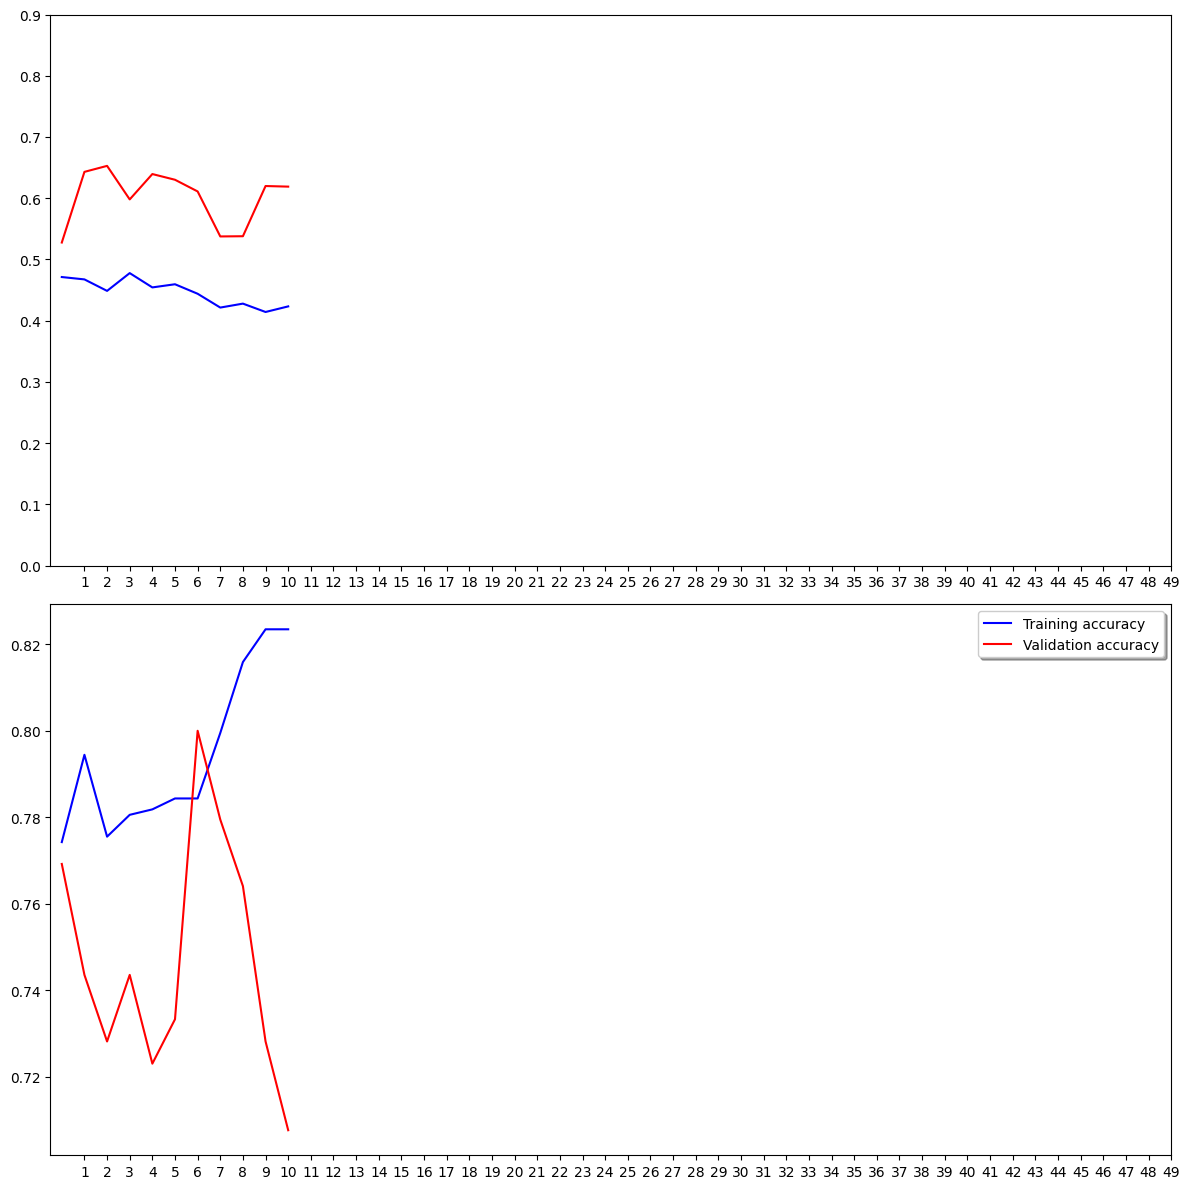

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
test_filenames = os.listdir("drive/MyDrive/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "drive/MyDrive/test",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 1020 validated image filenames.


In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


<ipython-input-31-52619fd72ccc>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [ ]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })


<Axes: xlabel='category'>

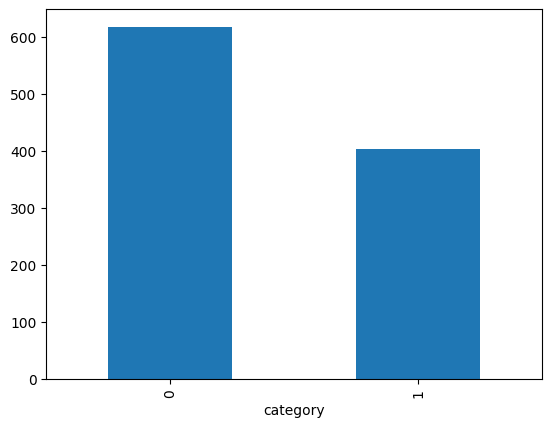

In [ ]:
test_df['category'].value_counts().plot.bar()

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("drive/MyDrive/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

NameError: name 'test_df' is not defined